In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
import numpy as np
import matplotlib.pyplot as plt


<h1> Part a </h1>

In [19]:
#you can print out the label for 1st figure
print(mnist.train.labels[0])

#learning rate
lr = 0.01
#number of traning steps
#num_steps =500
#number of batch_size
batch_size = 128

#network parameters
n_hidden_1 = 300
num_input = 784
num_classes = 10
layers_dims = [num_input, n_hidden_1, num_classes]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
def relu(Z):
    A = np.maximum(0, Z)
    return A, Z

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

In [24]:
def softmax(x):
    #print( np.sum(np.exp(x), axis=1).shape)
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [25]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

In [53]:
def initialize_parameters_zeros(layers_dims):
    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters['W' + str(l)] = np.random.normal(0,1,(layers_dims[l - 1],layers_dims[l]))
        parameters['b' + str(l)] = np.zeros((1,layers_dims[l]))

    return parameters

<h1> Part b </h1>

In [54]:
def linear_forward(A_prev, W, b):
    Z = np.matmul(A_prev, W) + b
    cache = (A_prev, W, b)
    return Z, cache

In [55]:
def linear_activation_forward(A_prev, W, b, activation_fn):
    if activation_fn == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [56]:
input_x, input_y = mnist.train.next_batch(batch_size, shuffle=False)
parameters = initialize_parameters_zeros(layers_dims)
hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
output_y = softmax(output_x)

In [57]:
cost = cross_entropy(output_y,input_y)
print('cost: ', cost)

cost:  2.414279443875752


<h1> Part c </h1>

In [104]:
#computer gradients of cost function?
dAL = - (np.divide(input_y, output_y) - np.divide(1 - input_y, 1 - output_y));
#print(dA_prev.shape)

<h1> Part d </h1>

In [21]:
def sigmoid_gradient(dA, Z):
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ

In [11]:
def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ

In [13]:
# define helper functions
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[0]
    
    dW = (1 / m) * np.dot(A_prev.T, dZ)
    db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T) 

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape

    return dA_prev, dW, db

In [14]:
def linear_activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db

In [105]:
 grads = {}
 grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")

In [106]:
 grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")

<h1> Part e </h1>

In [16]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters
#print(output_x.shape)

<h1> training </h1>

In [53]:
batch_size_list = [16,64,256,1024]
iterations = 3000

In [51]:
parameters = initialize_parameters(layers_dims)
#print(parameters['W1'])
grads = {}
cost_list = []

In [58]:
def accuracy(X, parameters, y):
    hidden_x, cache_1 = linear_activation_forward(X, parameters['W1'], parameters['b1'],"relu")
    #print(hidden_x.shape)
    output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
    #print(output_x.shape)
    output_y = softmax(output_x)
    #print(output_y[0])

    predict = np.argmax(output_y, axis = 1)
    labels = np.argmax(y, axis = 1)
    accuracy = np.mean(labels == predict) * 100
    return accuracy

When batch size is 16, the accuracy rate is: 40.83%, the training time are 2.1009 seconds
When batch size is 64, the accuracy rate is: 37.03%, the training time are 4.2738 seconds
When batch size is 256, the accuracy rate is: 41.64%, the training time are 13.3821 seconds
When batch size is 1024, the accuracy rate is: 43.03%, the training time are 44.5300 seconds


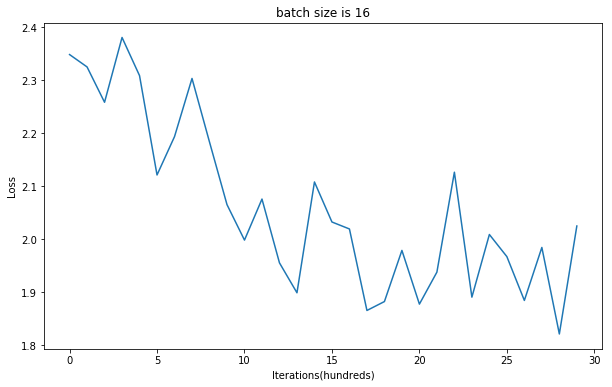

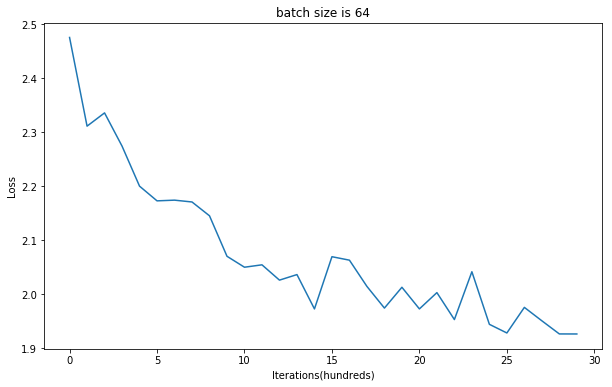

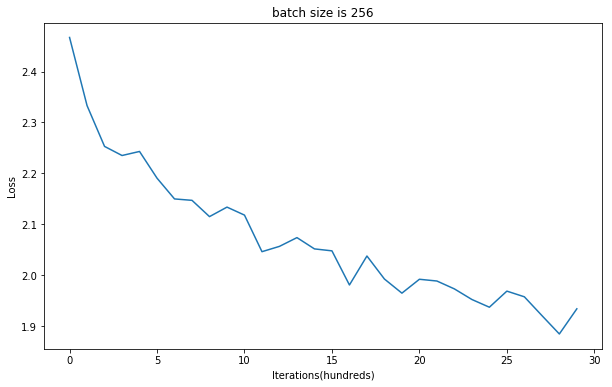

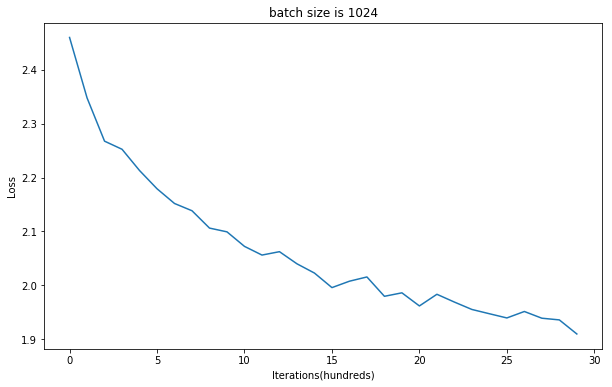

In [65]:
for j in range(len(batch_size_list)):
    batch_size = batch_size_list[j]
    cost_list = []
    grads = {}
    parameters = initialize_parameters(layers_dims)
    start_time = time.time()
    for i in range(iterations):
        input_x, input_y = mnist.train.next_batch(batch_size)
        hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
        #print(hidden_x.shape)
        output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
        #print(output_x.shape)
        output_y = softmax(output_x)
        #print(output_y[0])
        cost = cross_entropy(output_y,input_y)
        #cost_list.append(cost)
        #print('The cost is: ', cost)
        dAL = - (np.divide(input_y, output_y) - np.divide(1 - input_y, 1 - output_y));
        #print(dA_prev.shape)

        grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")
        grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")

        # update parameters
        parameters = update_parameters(parameters, grads, lr)

        # append each 100th cost to the cost list
        #if (i + 1) % 100 == 0:
         #   print("The cost after",i+1,"iterations is:",cost)
        if i % 100 == 0:
            cost_list.append(cost)
    use_time = time.time() - start_time
    accu = accuracy(mnist.test.images, parameters, mnist.test.labels)
    print(f"When batch size is {batch_size}, the accuracy rate is: {accu:.2f}%, the training time are {use_time:.4f} seconds")
    
    # plot the cost curve
    plt.figure(j,figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations(hundreds)")
    plt.ylabel("Loss")
    plt.title(f"batch size is {batch_size}")

<h1> Part f </h1>

In [106]:
def update_parameters_Adam(parameters, grads, lr, t, vs, sqrs):
    beta1 = 0.9
    beta2 = 0.999
    eps_stable = 1e-8
    
    for index in parameters:
        param = parameters[index]
        grad = grads["d" + index]
        v = vs[index]
        sqr = sqrs[index]
        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * np.square(grad)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        div = lr * v_bias_corr / (np.sqrt(sqr_bias_corr) + eps_stable)
        param[:] = param - div
    
    return parameters, vs, sqrs

In [81]:
def initialize_adam_parameter(parameters):
    vs = {}
    sqrs = {}
    L = len(parameters) // 2

    for l in range(1, L + 1):
        vs["W" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        vs["b" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        sqrs["W" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        sqrs["b" + str(l)] = np.zeros_like(parameters["b" + str(l)])
    return vs, sqrs
    

When batch size is 16, the accuracy rate is: 34.60%, the training time are 9.1363 seconds
When batch size is 64, the accuracy rate is: 59.72%, the training time are 10.1492 seconds
When batch size is 256, the accuracy rate is: 84.08%, the training time are 18.5492 seconds
When batch size is 1024, the accuracy rate is: 96.53%, the training time are 47.9576 seconds


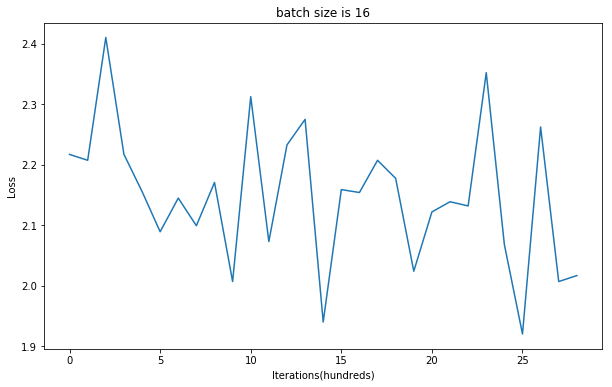

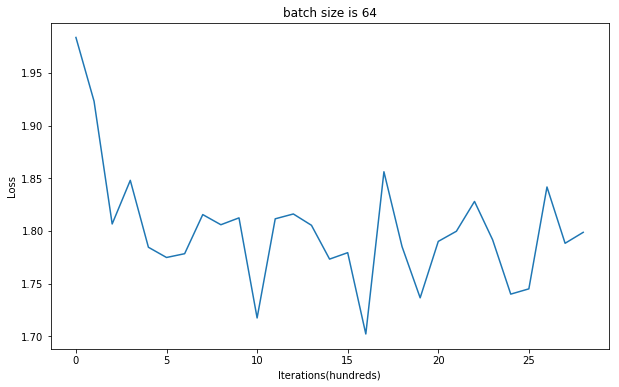

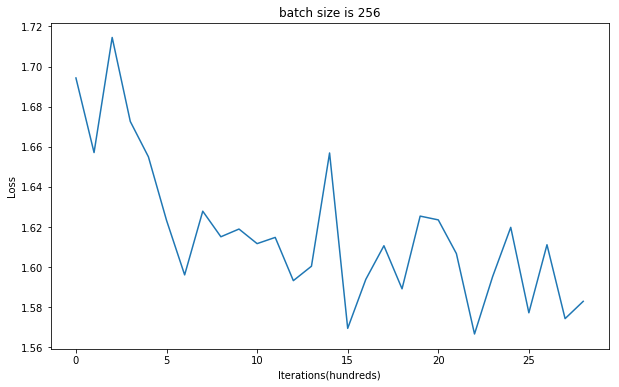

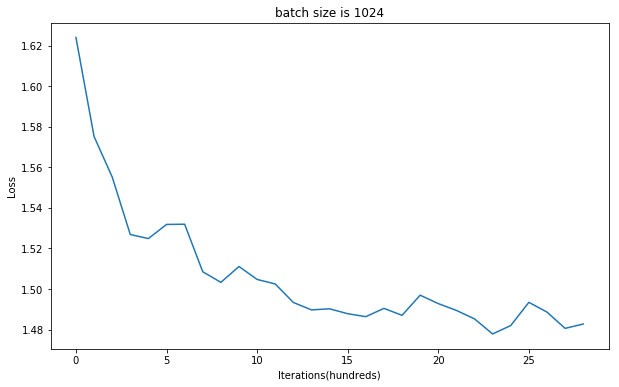

In [108]:
for j in range(len(batch_size_list)):
    batch_size = batch_size_list[j]
    cost_list = []
    grads = {}
    parameters = initialize_parameters(layers_dims)

    vs, sqrs = initialize_adam_parameter(parameters)
    #print(vs)
    start_time = time.time()
    
    for i in range(1,iterations):
        input_x, input_y = mnist.train.next_batch(batch_size)
        hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
        #print(hidden_x.shape)
        output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
        #print(output_x.shape)
        output_y = softmax(output_x)
        #print(output_y[0])
        cost = cross_entropy(output_y,input_y)
        #cost_list.append(cost)
        #print('The cost is: ', cost)
        dAL = - (np.divide(input_y, output_y) - np.divide(1 - input_y, 1 - output_y));
        #print(dA_prev.shape)

        grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")
        grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")

        # update parameters
        parameters, vs, sqrs = update_parameters_Adam(parameters, grads, lr, i, vs, sqrs)

        # append each 100th cost to the cost list
        #if (i + 1) % 100 == 0:
         #   print("The cost after",i+1,"iterations is:",cost)
        if i % 100 == 0:
            cost_list.append(cost)
    
    use_time = time.time() - start_time
    accu = accuracy(mnist.test.images, parameters, mnist.test.labels)
    print(f"When batch size is {batch_size}, the accuracy rate is: {accu:.2f}%, the training time are {use_time:.4f} seconds")
    
    # plot the cost curve
    plt.figure(j,figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations(hundreds)")
    plt.ylabel("Loss")
    plt.title(f"batch size is {batch_size}")

<h1> Part g </h1>

<h1> repeat d and e</h1>

In [28]:
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

lr_set = [0.01]
num_steps_set = [3000]
batch_size_set = [16,64,256,1024]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h1> use gradient descent optimizer </h1>

When batch size is 16, the accuracy rate is: 11.63%, the training time are 2.8572 seconds
When batch size is 64, the accuracy rate is: 9.48%, the training time are 3.0653 seconds
When batch size is 256, the accuracy rate is: 16.98%, the training time are 3.5679 seconds
When batch size is 1024, the accuracy rate is: 12.30%, the training time are 7.7654 seconds


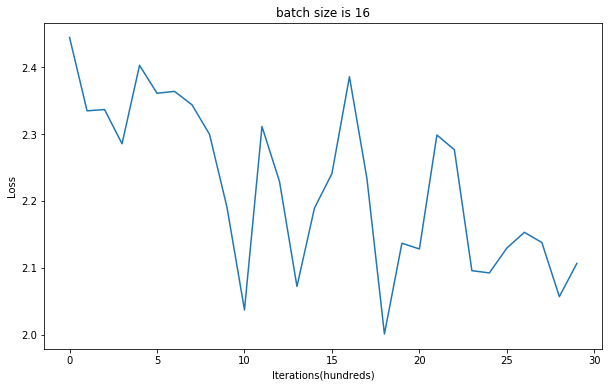

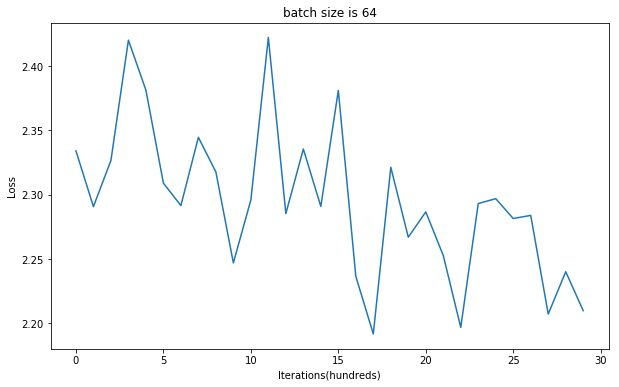

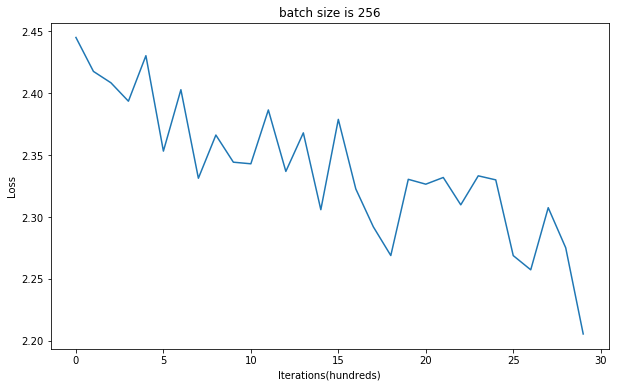

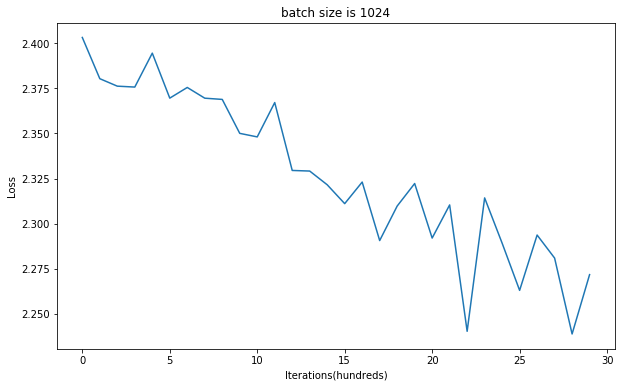

In [33]:
#fixed network parameters
num_input = 784
num_classes = 10
n_hidden_1 = 300
#varied network parameters
for lr in lr_set:
    for num_steps in num_steps_set:
        for batch_size in batch_size_set:
            for n_hidden_1 in n_hidden_1_set:
                    
                #Define placeholder and Variables
                tf.reset_default_graph()
                #tf graph input
                X = tf.placeholder(tf.float32,[None,num_input],name='X')
                Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

                #Layers weight & bias
                weights = {
                    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
                    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
                }

                biases = {
                    'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1]),name='b1'),
                    'bout': tf.Variable(tf.random_normal(shape=[num_classes]),name='bout')
                }

                #define nueral network
                def neural_net(x):
                    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
                    out = tf.sigmoid(tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout']))
                    return out     

                #define cost function and accuracy
                #predicted labels
                logits = neural_net(X)

                #define loss
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
                
                #define optimizer
                optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
                train_op = optimizer.minimize(loss)

                #compare the predicted labels with true labels
                correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

                #compute the accuracy by taking average
                accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

                #Initialize the variables
                init = tf.global_variables_initializer()

                cost_list = []
                #execute training
                with tf.Session() as sess:
                    sess.run(init)
                    start_time = time.time()
                    for i in range(num_steps):
                        #fetch batch
                        batch_x, batch_y = mnist.train.next_batch(batch_size)
                        #run optimization
                        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
                        if i % 100 == 0:
                            cost_list.append(sess.run(loss, feed_dict={X:batch_x, Y:batch_y}))


                    use_time = time.time() - start_time
                    accu = sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels})*100
                    print(f"When batch size is {batch_size}, the accuracy rate is: {accu:.2f}%, the training time are {use_time:.4f} seconds")
                    
                    # plot the cost curve
                    plt.figure(figsize=(10, 6))
                    plt.plot(cost_list)
                    plt.xlabel("Iterations(hundreds)")
                    plt.ylabel("Loss")
                    plt.title(f"batch size is {batch_size}")

<h1> Use adam </h1>

When batch size is 16, the accuracy rate is: 40.11%, the training time are 4.3270 seconds
When batch size is 64, the accuracy rate is: 49.21%, the training time are 2.4334 seconds
When batch size is 256, the accuracy rate is: 73.35%, the training time are 3.8037 seconds
When batch size is 1024, the accuracy rate is: 95.44%, the training time are 7.9897 seconds


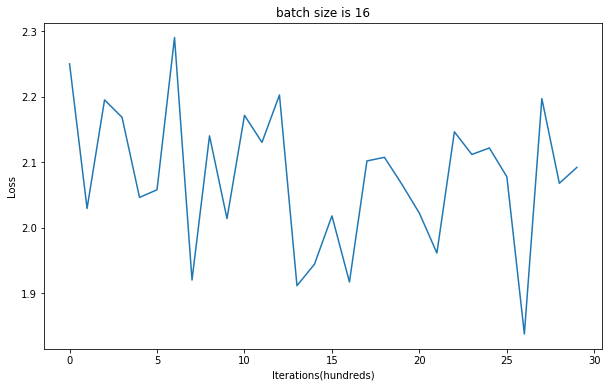

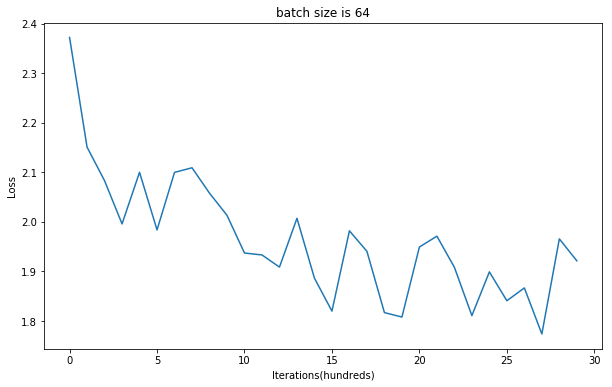

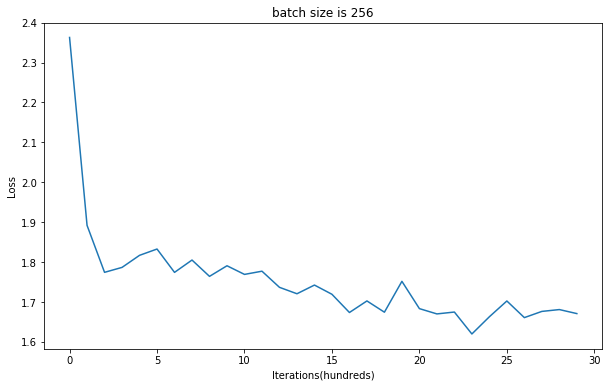

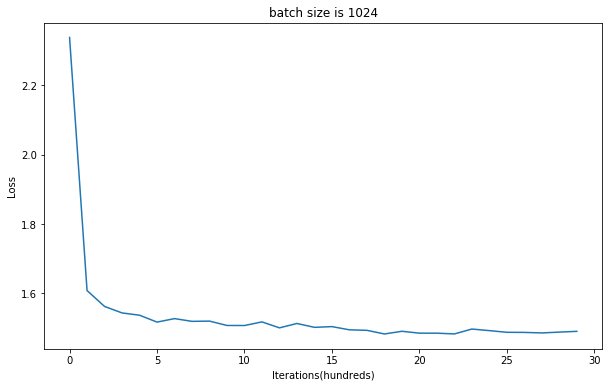

In [34]:
#fixed network parameters
num_input = 784
num_classes = 10
n_hidden_1 = 300
#varied network parameters
for lr in lr_set:
    for num_steps in num_steps_set:
        for batch_size in batch_size_set:
            for n_hidden_1 in n_hidden_1_set:
                    
                #Define placeholder and Variables
                tf.reset_default_graph()
                #tf graph input
                X = tf.placeholder(tf.float32,[None,num_input],name='X')
                Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

                #Layers weight & bias
                weights = {
                    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
                    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
                }

                biases = {
                    'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1]),name='b1'),
                    'bout': tf.Variable(tf.random_normal(shape=[num_classes]),name='bout')
                }

                #define nueral network
                def neural_net(x):
                    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
                    out = tf.sigmoid(tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout']))
                    return out     

                #define cost function and accuracy
                #predicted labels
                logits = neural_net(X)

                #define loss
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
                
                #define optimizer
                optimizer = tf.train.AdamOptimizer(learning_rate=lr)
                train_op = optimizer.minimize(loss)

                #compare the predicted labels with true labels
                correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

                #compute the accuracy by taking average
                accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

                #Initialize the variables
                init = tf.global_variables_initializer()

                cost_list = []
                #execute training
                with tf.Session() as sess:
                    sess.run(init)
                    start_time = time.time()
                    for i in range(num_steps):
                        #fetch batch
                        batch_x, batch_y = mnist.train.next_batch(batch_size)
                        #run optimization
                        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
                        if i % 100 == 0:
                            cost_list.append(sess.run(loss, feed_dict={X:batch_x, Y:batch_y}))


                    use_time = time.time() - start_time
                    accu = sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels})*100
                    print(f"When batch size is {batch_size}, the accuracy rate is: {accu:.2f}%, the training time are {use_time:.4f} seconds")
                    
                    # plot the cost curve
                    plt.figure(figsize=(10, 6))
                    plt.plot(cost_list)
                    plt.xlabel("Iterations(hundreds)")
                    plt.ylabel("Loss")
                    plt.title(f"batch size is {batch_size}")

<h1> Comparision </h1>

For gradient descent optimizer, the tensorflow nueral network gets similar initial loss(when iteration=0), lower accuracy but smaller training time compared to the numpy nueral network. However, for adam optimizer, the two networks have similar results.